# Online Shoppers Purchasing Intention

## Table of Contents

1. Dataset
2. Data Explorations

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('dataset/online_shoppers_intention.csv')

## 1. Dataset

### Introduction

This dataset is from [UCI Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#)

* 12330 sessions
* 10 numerical attributes
* 8 categorical attributes.


### Attributes

* 使用者在 session 中瀏覽的 **網頁類型數量** 和 **時間長短**
    （注：Administrative, Informational, ProductRelated 爲三種不同網頁類型）
    * Administrative
    * Administrative_Duration
    * Informational
    * Informational_Duration
    * ProductRelated
    * ProductRelated_Duration


* Google Analytics 測量的 Metrics
    
    * BounceRates 跳出率：使用者來到網站後 “只瀏覽當下網頁” 就離開的百分比
    * ExitRates 離開率：使用者在使用網站期間，在 “某一頁離開網站” 的百分比
    * PageValues 網頁價值：使用者在完成 “電子交易” 時所訪問網頁的平均價值
        （注：可以了解哪一些網頁對於網站收益更有貢獻）
        

* SpecialDay：session 距離特殊節日的接近度（例：情人節、母親節）
* Month：月份
* OperatingSystems：使用者的 OS
* Browser：使用者的瀏覽器
* Region：使用者的地區
* TrafficType：（未說明）
* VisitorType：使用者種類，包括 Returning_Visitor, New_Visitor, Other
* Weekend：是否爲周末
* Revenue：最後是否有完成購買

### A glimpse of the dataset

In [3]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Check for Null value

There are 12330 values and no null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### 資料集中的 Month 只有二月到十二月（中間缺四月的值）

In [6]:
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

### Preprocessing

1. Month 換成 1~12 的數值 Value
2. Visitor Type 換成 0~2 的數值 Value
3. Weekend 換成 0,1 的數值 Value
4. Revenue 換成 0,1 的數值 Value


In [7]:
month_dict = {'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,
       'Dec':12}

visitor_dict = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}

true_false_dict = {True:1, False:0}

def mapping(col, arg):
    temp = data[col].map(arg)
    data.drop([col], axis=1)
    data[col] = temp


mapping('Month', month_dict)
mapping('VisitorType', visitor_dict)
mapping('Weekend', true_false_dict)
mapping('Revenue', true_false_dict)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float

## 2. Data Explorations

### Data 中購買人數比例


84.53% 的人沒有進行購物

15.47% 的人有進行購物

84.53 Percent people don't buy
15.47 Percent people buy


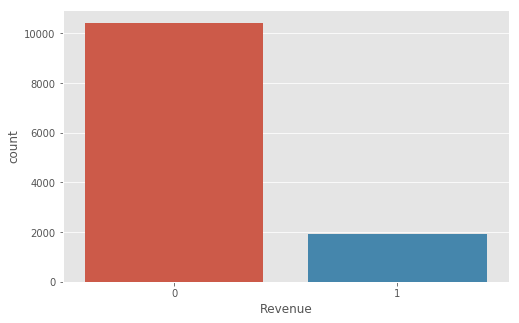

In [9]:
buy_count = len(data[data['Revenue'] == 1])
not_buy_count = len(data[data['Revenue'] == 0])
total = len(data)

print("%.2f Percent people don't buy" % (not_buy_count*100/total))
print('%.2f Percent people buy' % (buy_count*100/total))

plt.figure(figsize=(8,5))
sns.countplot(data['Revenue'])
plt.show()

### 周間購買率 vs 周末購買率

周末的購買率比平日的購買率稍高

In [10]:
weekday = len(data[(data['Revenue']==1) & (data['Weekend']==0)]) * 100 / len(data[data['Weekend'] == 0])
weekend = len(data[(data['Revenue']==1) & (data['Weekend']==1)]) * 100 / len(data[data['Weekend'] == 1])

print('%.2f Percent People buy on weekends' % weekend)
print('%.2f Percent People buy on weekdays' % weekday)

17.40 Percent People buy on weekends
14.89 Percent People buy on weekdays


### Special Day 的購買率

Special Day 會大幅影響購買率

In [11]:
special = len(data[(data['Revenue']==1) & (data['SpecialDay']==0)]) * 100 / len(data[data['SpecialDay'] == 0])
not_special = len(data[(data['Revenue']==1) & (data['SpecialDay'] > 0)]) * 100 / len(data[data['SpecialDay'] > 0])

print('%.2f Percent People buy near special days' % special)
print('%.2f Percent People buy on not special days' % not_special)

16.53 Percent People buy near special days
6.16 Percent People buy on not special days


### 每個月份購買的人數

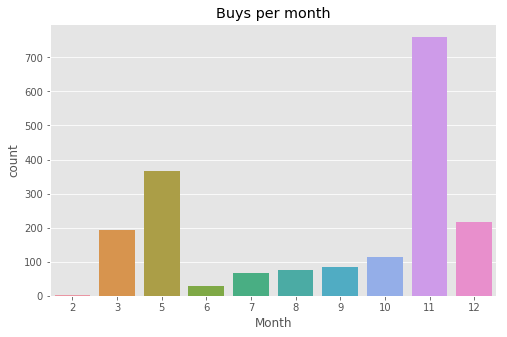

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data[data['Revenue']==1]['Month'])
plt.title('Buys per month')
plt.show()

### 每個月使用者人數

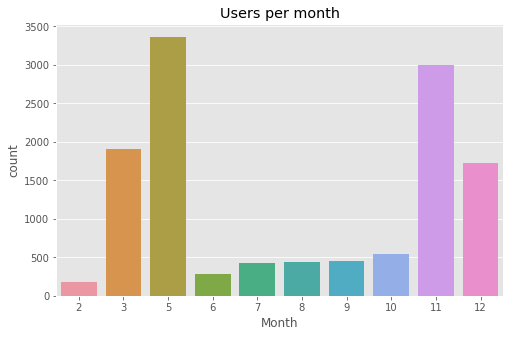

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data['Month'])
plt.title('Users per month')
plt.show()

In [14]:
def draw_buy_percent(col):
    buy = data[data['Revenue']==1].groupby(col).count()['Revenue'].reset_index()
    not_buy = data.groupby(col).count()['Revenue'].reset_index()
    
    matrix = pd.merge(buy, not_buy, how='right', on=col, suffixes=('_buy', '_not_buy'), sort=True).fillna(0)
    matrix['Buy_percent'] = matrix['Revenue_buy']*100/matrix['Revenue_not_buy']
    print(matrix)
    plt.figure(figsize=(8,5))
    plt.plot(matrix[col], matrix['Buy_percent'],'p-')
    plt.xticks(matrix[col])
    plt.title('Buy Percent each ' + col)
    plt.show()

### 每個月的購買比例

   Month  Revenue_buy  Revenue_not_buy  Buy_percent
0      2            3              184     1.630435
1      3          192             1907    10.068170
2      5          365             3364    10.850178
3      6           29              288    10.069444
4      7           66              432    15.277778
5      8           76              433    17.551963
6      9           86              448    19.196429
7     10          115              549    20.947177
8     11          760             2998    25.350233
9     12          216             1727    12.507238


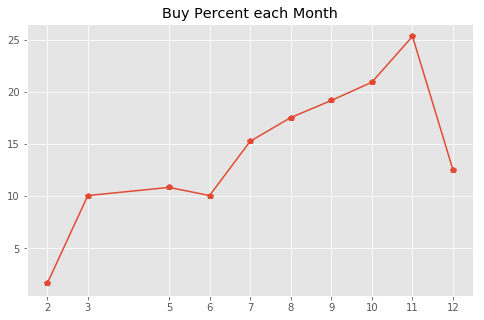

In [15]:
draw_buy_percent('Month')

### 每一類 OS 使用者的購買比例

   OperatingSystems  Revenue_buy  Revenue_not_buy  Buy_percent
0                 1          379             2585    14.661509
1                 2         1155             6601    17.497349
2                 3          268             2555    10.489237
3                 4           85              478    17.782427
4                 5            1                6    16.666667
5                 6            2               19    10.526316
6                 7            1                7    14.285714
7                 8           17               79    21.518987


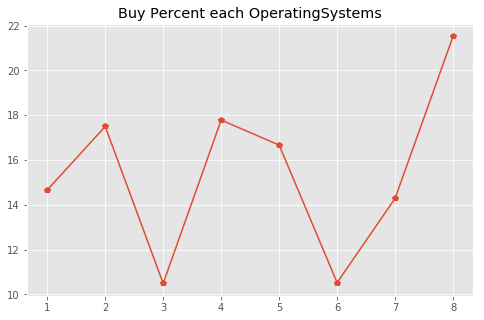

In [16]:
draw_buy_percent('OperatingSystems')

### 每一類 Traffic 的購買比例

    TrafficType  Revenue_buy  Revenue_not_buy  Buy_percent
0             1        262.0             2451    10.689514
1             2        847.0             3913    21.645796
2             3        180.0             2052     8.771930
3             4        165.0             1069    15.434986
4             5         56.0              260    21.538462
5             6         53.0              444    11.936937
6             7         12.0               40    30.000000
7             8         95.0              343    27.696793
8             9          4.0               42     9.523810
9            10         90.0              450    20.000000
10           11         47.0              247    19.028340
11           12          0.0                1     0.000000
12           13         43.0              738     5.826558
13           14          2.0               13    15.384615
14           15          0.0               38     0.000000
15           16          1.0                3    33.3333

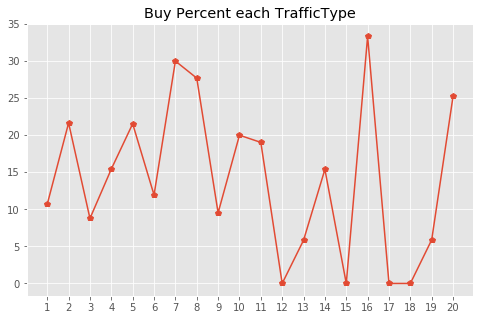

In [17]:
draw_buy_percent('TrafficType')

### 每個 Region 的購買比例

   Region  Revenue_buy  Revenue_not_buy  Buy_percent
0       1          771             4780    16.129707
1       2          188             1136    16.549296
2       3          349             2403    14.523512
3       4          175             1182    14.805415
4       5           52              318    16.352201
5       6          112              805    13.913043
6       7          119              761    15.637319
7       8           56              434    12.903226
8       9           86              511    16.829746


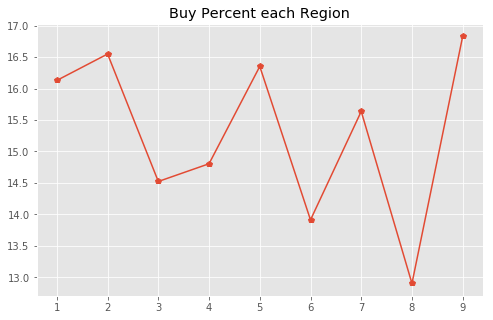

In [18]:
draw_buy_percent('Region')

### 每個 Visitor Type 的購買比例

   VisitorType  Revenue_buy  Revenue_not_buy  Buy_percent
0            0         1470            10551    13.932329
1            1          422             1694    24.911452
2            2           16               85    18.823529


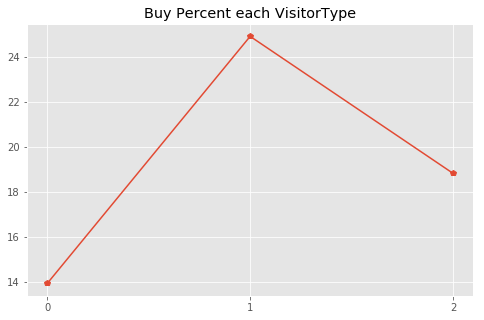

In [19]:
draw_buy_percent('VisitorType')

### 每一種 Browser 的購買比例

    Browser  Revenue_buy  Revenue_not_buy  Buy_percent
0         1        365.0             2462    14.825345
1         2       1223.0             7961    15.362392
2         3          5.0              105     4.761905
3         4        130.0              736    17.663043
4         5         86.0              467    18.415418
5         6         20.0              174    11.494253
6         7          6.0               49    12.244898
7         8         21.0              135    15.555556
8         9          0.0                1     0.000000
9        10         32.0              163    19.631902
10       11          1.0                6    16.666667
11       12          3.0               10    30.000000
12       13         16.0               61    26.229508


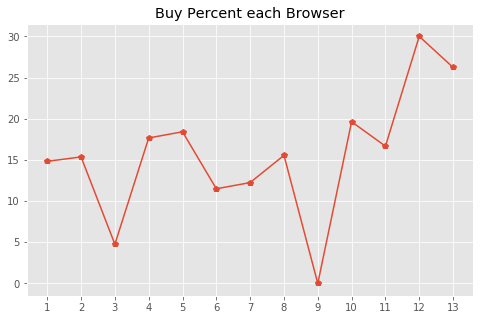

In [20]:
draw_buy_percent('Browser')

### Correlation Matrix

In [22]:
corr = data['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']

KeyError: ('Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue')

## References
[Google Analytics Document](https://support.google.com/analytics#topic=3544906)
    
[Google Analytics的跳出率(Bounce Rate)與離開率(Exit Rate)，你了解他們的差別嗎？](https://www.startdo.tw/google-analytics/google-analytics%E7%9A%84%E8%B7%B3%E5%87%BA%E7%8E%87bounce-rate%E8%88%87%E9%9B%A2%E9%96%8B%E7%8E%87exit-rate/)